In [9]:
# https://medium.com/swlh/lsb-image-steganography-using-python-2bbbee2c69a2 
# https://towardsdatascience.com/hiding-data-in-an-image-image-steganography-using-python-e491b68b1372

In [1]:
import numpy as np
from PIL import Image

In [2]:
def Encode(src,password,message, dest):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size//n
    # text will be '#####"$s4h1"@@@@@@@@"$t3g0"'
    # here '####' will be password and '@@@@' will be message

    message_delimiter="$t3g0"
    passsword_limiter="$s4h1"    

    message += message_delimiter
    message=password+passsword_limiter+message
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels: # check if image is large enough to store the message and password
        print("ERROR: Need larger file size")
    else:
        index=0
        for p in range(total_pixels):
            for q in range(m, n):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1
        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")

In [2]:
img=Image.open('images/amsterdam.jpg')

In [5]:
len(list(img.getdata()))

23740000

In [59]:
##################################

In [2]:
def Encode(src, message, dest):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size//n

    message += "$t3g0"
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels:
        print("ERROR: Need larger file size")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(m, n):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1

        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")

In [3]:
def Decode(src):

    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size//n

    hidden_bits = ""
    for p in range(total_pixels):
        for q in range(m, n):
            hidden_bits += (bin(array[p][q])[2:][-1])

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]

    message = ""
    for i in range(len(hidden_bits)):
        if message[-5:] == "$t3g0":
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    if "$t3g0" in message:
        print("Hidden Message:", message[:-5])
    else:
        print("No Hidden Message Found")

In [7]:
Encode(src='images/shore.jpg',message='Hello World This is test',dest='images/shore_enc.jpg')

Image Encoded Successfully


In [8]:
Decode(src='images/shore_enc.jpg')

No Hidden Message Found


In [1]:
import  numpy as np
import cv2
import matplotlib.pyplot as plt




In [9]:
amsterdam_img=cv2.imread('images/amsterdam.jpg') 

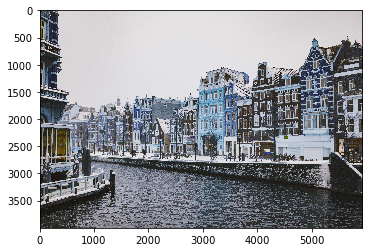

In [10]:
plt.imshow(amsterdam_img)

In [11]:
amsterdam_img.shape #read as BGR

(4000, 5935, 3)

In [13]:
for i in range(0,amsterdam_img.shape[0]):
    for j in range(0,amsterdam_img.shape[1]):
        pixel = amsterdam_img[i,j]
        for BGR_index in range(len(pixel)):
            pixel[BGR_index]=embed_message(pixel[BGR_index],bit_val) #first tuple is BGR values and next is 3 message bits 
            

[114 126 138] 114 126 138
[118 130 142] 118 130 142
[119 129 139] 119 129 139
[119 129 139] 119 129 139
[121 131 141] 121 131 141
[115 125 135] 115 125 135
[108 118 128] 108 118 128
[110 120 130] 110 120 130
[111 120 134] 111 120 134
[112 121 135] 112 121 135
[104 113 127] 104 113 127
[ 95 104 117] 95 104 117
[ 96 102 115] 96 102 115
[ 92  99 108] 92 99 108
[ 88  93 102] 88 93 102
[83 89 96] 83 89 96
[ 96 102 113] 96 102 113
[100 106 117] 100 106 117
[ 97 103 114] 97 103 114
[ 89  95 106] 89 95 106
[ 86  92 105] 86 92 105
[ 92  98 111] 92 98 111
[ 95 103 116] 95 103 116
[ 94 102 115] 94 102 115
[104 113 126] 104 113 126
[113 122 135] 113 122 135
[109 121 133] 109 121 133
[104 116 128] 104 116 128
[110 119 132] 110 119 132
[114 123 136] 114 123 136
[112 120 133] 112 120 133
[109 118 131] 109 118 131
[102 111 124] 102 111 124
[101 113 125] 101 113 125
[103 113 123] 103 113 123
[ 93 103 113] 93 103 113
[ 85  94 103] 85 94 103
[ 92 101 110] 92 101 110
[ 94 102 109] 94 102 109
[78 86 93] 78

[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[216 211 212] 216 211 212
[216 211 212] 216 211 212
[216 211 212] 216 211 212
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 215] 218 213 215
[218 213 215] 218 213 215
[215 210 212] 215 210 212
[216 211 213] 216 211 213
[216 211 212] 216 211 212
[216 211 212] 216 211 212
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[218 213 214] 218 213 214
[217 212 213] 217 212 213
[217 212 213] 217 212 213
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214] 218 213 214
[218 213 214

[214 209 211] 214 209 211
[213 208 210] 213 208 210
[213 208 210] 213 208 210
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[214 209 210] 214 209 210
[213 208 209] 213 208 209
[211 206 207] 211 206 207
[212 207 208] 212 207 208
[212 207 208] 212 207 208
[212 207 208] 212 207 208
[213 208 209] 213 208 209
[214 209 210] 214 209 210
[214 209 210] 214 209 210
[214 209 210] 214 209 210
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[214 209 211

[215 210 212] 215 210 212
[216 211 213] 216 211 213
[217 212 214] 217 212 214
[213 208 210] 213 208 210
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[216 211 213] 216 211 213
[217 212 214] 217 212 214
[217 212 214] 217 212 214
[216 211 213] 216 211 213
[214 209 211] 214 209 211
[215 210 212] 215 210 212
[215 210 212] 215 210 212
[216 211 213] 216 211 213
[216 211 213] 216 211 213
[216 211 213] 216 211 213
[215 210 212] 215 210 212
[214 209 211] 214 209 211
[214 209 211] 214 209 211
[217 212 214] 217 212 214
[217 212 214] 217 212 214
[215 212 214] 215 212 214
[215 212 214] 215 212 214
[215 212 214] 215 212 214
[214 211 213] 214 211 213
[214 211 213] 214 211 213
[214 211 213] 214 211 213
[219 214 216] 219 214 216
[218 213 215] 218 213 215
[216 211 213] 216 211 213
[216 211 213] 216 211 213
[217 212 214] 217 212 214
[217 212 214] 217 212 214
[217 212 214] 217 212 214
[217 212 214] 217 212 214
[219 214 216] 219 214 216
[219 214 216] 219 214 216
[219 214 216] 219 214 216
[219 214 216

[220 215 217] 220 215 217
[221 216 218] 221 216 218
[223 218 220] 223 218 220
[224 219 221] 224 219 221
[224 219 221] 224 219 221
[223 218 220] 223 218 220
[222 217 219] 222 217 219
[219 214 216] 219 214 216
[220 215 217] 220 215 217
[219 216 218] 219 216 218
[220 217 219] 220 217 219
[220 217 219] 220 217 219
[221 218 220] 221 218 220
[221 220 222] 221 220 222
[222 221 223] 222 221 223
[221 218 220] 221 218 220
[221 218 220] 221 218 220
[221 218 220] 221 218 220
[221 218 220] 221 218 220
[221 218 220] 221 218 220
[221 218 220] 221 218 220
[222 219 221] 222 219 221
[222 219 221] 222 219 221
[220 217 219] 220 217 219
[221 218 220] 221 218 220
[222 219 221] 222 219 221
[222 219 221] 222 219 221
[222 219 221] 222 219 221
[221 218 220] 221 218 220
[220 217 219] 220 217 219
[219 216 218] 219 216 218
[220 217 219] 220 217 219
[220 217 219] 220 217 219
[221 218 220] 221 218 220
[222 219 221] 222 219 221
[222 219 221] 222 219 221
[221 218 220] 221 218 220
[220 217 219] 220 217 219
[220 217 219

KeyboardInterrupt: 

In [29]:
def embed_message(pixel_val,messagebit):
    bin_val_pixel=decimal_to_binary(pixel_val)
    bin_val_pixel_lst=list(bin_val_pixel)
    if(messagebit=='0'):
        bin_val_pixel_lst[-1]='0'
    else:
        bin_val_pixel_lst[-1]='1'
    bin_val_pixel=''.join(bin_val_pixel_lst)
    int_val_pixel=binary_to_decimal(bin_val_pixel)
    return int_val_pixel

In [26]:
def binary_to_decimal(n):  # takes string input && returns integer
        return(int(n, 2))
    
def decimal_to_binary(n):  # takes integer input && returns string
    return(format(n, '08b'))


In [30]:
def construct_message_string(message,key): # accepts sting message and string key;  returns string 
    message_delimiter="$t3g0"
    key_delimiter="$s4h1"    
    message += message_delimiter
    message=key+key_delimiter+message
    b_message = ''.join([format(ord(i), "08b") for i in message])
    return b_message

In [ ]:
binary_to_decimal('1001')

In [55]:
def hide_message_in_image(image_add,message,key):
    img1=cv2.imread(image_add)
    img=img1
    binary_message=construct_message_string(message=message,key=key)
    req_pixels=len(binary_message)
    message_bit_pointer=0
    if(req_pixels<img.shape[0]*img.shape[1]*img.shape[2]):
        print('hiding.....')
        for i in range(0,img.shape[0]):
            for j in range(0,img.shape[1]):
                pixel = img[i,j]
                for BGR_index in range(len(pixel)):
                    if(message_bit_pointer<req_pixels):
                        pixel[BGR_index]=embed_message(pixel[BGR_index],binary_message[message_bit_pointer]) #first  BGR valus and next is  message bit
                        img[i,j]=pixel
                        message_bit_pointer+=1
        print('Operation Complete saving image')
        new_name=image_add.split('.')
#         new_name.insert(['_stego'],1)
        nname='_stego.'.join(new_name)
        print(nname)
        cv2.imwrite(nname,img)
        plt.imshow(img1)        
        plt.imshow(img)
    else:
        print("insufficient image size")

In [56]:
def get_hidden_bits(img):
    hidden_bits=''
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel=img[i,j]
            for one_pixel in pixel:
                hidden_bits+=decimal_to_binary(one_pixel)[-1]
    return hidden_bits

In [53]:
def decrypt_message_from_image(img_path,key):
    img=cv2.imread(img_path)
    hidden_message=''
    ogkey=''
    hidden_bits=get_hidden_bits(img)
    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]
#     print(hidden_bits)
    message = ""
    for i in range(len(hidden_bits)):
        if message[-5:] == "$t3g0":
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    print(message)
    if "$t3g0" not in message:
        print("No Hidden Message Found")
        return False
    else:
        ogkey,hidden_message=message.split('$s4h1')
        print(ogkey,hidden_message)
        if(ogkey==key):
            print(hidden_message)
        else:
            print('Incorrect key')

hiding.....
Operation Complete saving image
images/castle_stego.jpg


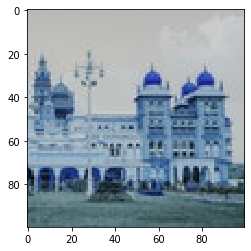

In [57]:
hide_message_in_image(image_add='images/castle.jpg',message='Hello World',key='12345')

In [58]:
decrypt_message_from_image(img_path='images/castle_stego.jpg',key='12345')

¹$I$I$I$m¶ÛI$m¶Ûÿÿm¶ÛÉ#Ç p1àvÜI$FÛm¹$I$FÛm¶Ûm¶À Ûm¸Û±Çãøã` rHÛI$m¶ÛI$I$I$m¶ÛÿÿI$¶ä qÿüqÄm¶Ûm¶Ûm¶Ûm¶Ûm¹$I$I?ÿù$I$¾? 'Im¶Ûm¶Ûm¶Ûm¶Ûm¶ÛI$I$ÿÿm¶Ûm¶äàÇ½ØæÜI$I$I$FÛm¶Ûm¶Ûm¶À Ûm¶ÛÏøü$Ûc¶nI$I$I$I$I$m¶Ûm¶Ûl  I$HäèqÿlãFäI$I$I$I$FÛm¶Ûm¶À 	$I$n0¿à	1;#I$m¶Ûm¶Ûm¶ÛI$I$m¶ÛsømÉ#FäôqÿNFÛm¶Ûm¶Ûm¶Ûm¶Ûm¹$I$G8wÇE@ y1'i$m¶Ûm¶Ûm¶Ûm¶Ûm¶ÛI$I$sÿÀÿàÇµQñ'm¶Ûm¹$I$I$FÛm¶Ûm¹$G8ÿþ? ÿRãbv'$m¶ÛI$I$I$I$m¶Ûm¶Û~ Äí'mµRNØãI$I$FÛm¹$I$FÛm¶Ûm¶ÇòI$í±ÛRØIØæÛI$m¶Ûm¶Ûm¶ÛI$I$m¶ÛÇ'bN$ìN«I;mI$FÛm¶Ëm¶Ûm¶Ûm¹$I$i|}GDjÿlGº9$9·7- Å·#m¶ÛM´ÿÉ¤@vká4¦·Á¶¾ÕRdí£¸änÂÙ[qÆÛm¹$ÛKü$ 2±6eÆ¤»QÑ¶^&vLç#qÃ$$½:7m¶Ûm²IÚOî,¹_ª²­ó¯ ÅHmÛ	à©$&òdVI$I$Û`@½Ú¾-j73{[âÇrNÇù¼á¶öÒRoÐ\ÌI$M¶-Ø\Uª¡ÞF²T¶O	T1ÛÀ5#li?'ÉÂòÙ$I$ÛfÉ¥vUåOÛô9)´àsRoÃ>`&I$I$AZÄÜÖ^­èVÐ Ù¿Ø<m/3 ±$J$I$D-,[q?4vTÕU´Í±¼#M67ñÌXôÜ ÆÛe·Çÿ²J¼*kUI6$û7×ô,ñí9,¨ÿÇ$}ÿö)ÚÉ6Õ /FIÅÖ¼À9)Ðä¡¶ìãþºN]`#

False

In [38]:
img_1=cv2.imread('images/amsterdam.jpg')
img_2=cv2.imread('images/amsterdam_stego.jpg')


In [40]:
img_1.shape

(4000, 5935, 3)

In [41]:
img_2.shape

(4000, 5935, 3)

In [42]:
for i in range(0,img_1.shape[0]):
    for j in range(0,img_1.shape[1]):
        print(img_1[i,j],img_2[i,j])

[114 126 138] [114 126 138]
[118 130 142] [118 130 142]
[119 129 139] [116 128 140]
[119 129 139] [117 129 141]
[121 131 141] [122 131 144]
[115 125 135] [114 123 136]
[108 118 128] [107 116 129]
[110 120 130] [111 120 133]
[111 120 134] [111 120 134]
[112 121 135] [112 121 135]
[104 113 127] [105 113 126]
[ 95 104 117] [ 96 104 117]
[ 96 102 115] [ 96 102 113]
[ 92  99 108] [ 93 100 109]
[ 88  93 102] [ 90  92 102]
[83 89 96] [83 89 96]
[ 96 102 113] [ 98 102 113]
[100 106 117] [100 106 117]
[ 97 103 114] [100 104 115]
[ 89  95 106] [ 91  95 106]
[ 86  92 105] [ 86  92 103]
[ 92  98 111] [ 93  99 110]
[ 95 103 116] [ 95 103 116]
[ 94 102 115] [ 94 102 115]
[104 113 126] [104 113 126]
[113 122 135] [112 121 134]
[109 121 133] [110 122 134]
[104 116 128] [104 116 128]
[110 119 132] [109 118 131]
[114 123 136] [114 123 136]
[112 120 133] [113 121 134]
[109 118 131] [109 117 130]
[102 111 124] [102 111 124]
[101 113 125] [103 112 125]
[103 113 123] [103 113 123]
[ 93 103 113] [ 93 103 113

[218 213 215] [218 212 217]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[216 211 213] [216 211 213]
[216 211 213] [216 211 213]
[215 210 211] [215 210 211]
[215 210 211] [215 210 211]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[218 213 214] [218 213 214]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[219 214 216] [219 214 216]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [217 212 214]
[217 212 214] [218 213 215]
[218 213 215] [218 213 215]
[218 213 215] [218 213 215]
[219 214 216] [219 214 216]
[219 214 216] [219 2

[217 212 213] [217 212 213]
[217 212 213] [217 212 213]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[214 209 211] [214 209 211]
[214 209 211] [214 209 211]
[213 208 210] [213 208 210]
[214 209 211] [214 209 211]
[214 209 211] [214 209 211]
[214 209 211] [214 209 211]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[214 209 211] [214 209 211]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[214 209 211] [214 209 211]
[212 207 209] [212 207 209]
[211 206 208] [211 206 208]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[217 212 214] [217 212 214]
[216 211 213] [216 211 213]
[216 211 213] [216 2

[214 209 210] [214 209 210]
[216 211 212] [216 211 212]
[218 213 214] [218 213 214]
[217 212 213] [217 212 213]
[214 209 210] [214 209 210]
[217 212 214] [217 212 214]
[216 211 213] [216 211 213]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[214 209 211] [214 209 211]
[213 208 210] [213 208 210]
[213 208 210] [213 208 210]
[216 211 213] [216 211 213]
[218 213 215] [218 213 215]
[217 212 214] [217 212 214]
[215 210 212] [215 210 212]
[216 211 213] [216 211 213]
[216 211 213] [216 211 213]
[215 210 212] [215 210 212]
[216 211 213] [216 211 213]
[217 212 214] [217 212 214]
[217 212 214] [218 213 215]
[217 212 214] [217 212 214]
[216 211 213] [216 211 213]
[215 210 212] [215 210 212]
[216 211 213] [216 211 213]
[216 211 213] [216 211 213]
[214 209 211] [214 209 211]
[215 210 212] [215 210 212]
[215 210 212] [215 210 212]
[214 209 211] [214 209 211]
[212 207 209] [212 207 209]
[213 208 210] [213 208 210]
[215 210 212] [215 2

[225 220 222] [225 220 222]
[223 218 220] [223 218 220]
[220 215 217] [219 214 216]
[219 214 216] [220 215 217]
[220 215 217] [220 215 217]
[221 216 218] [221 216 218]
[223 218 220] [223 218 220]
[224 219 221] [224 219 221]
[224 219 221] [224 219 221]
[223 218 220] [223 218 220]
[222 217 219] [222 217 219]
[219 214 216] [219 214 216]
[220 215 217] [220 215 217]
[219 216 218] [219 216 218]
[220 217 219] [220 217 219]
[220 217 219] [220 217 219]
[221 218 220] [221 218 220]
[221 220 222] [221 220 222]
[222 221 223] [222 221 223]
[221 218 220] [221 218 220]
[221 218 220] [221 218 220]
[221 218 220] [221 218 220]
[221 218 220] [221 218 220]
[221 218 220] [221 218 220]
[221 218 220] [221 218 220]
[222 219 221] [222 219 221]
[222 219 221] [222 219 221]
[220 217 219] [220 217 219]
[221 218 220] [221 218 220]
[222 219 221] [222 219 221]
[222 219 221] [222 219 221]
[222 219 221] [222 219 221]
[221 218 220] [221 218 220]
[220 217 219] [220 217 219]
[219 216 218] [219 216 218]
[220 217 219] [219 2

[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[225 222 224] [225 222 224]
[224 221 223] [224 221 223]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[225 222 224] [226 223 225]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [225 222 224]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[224 221 223] [224 221 223]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[225 222 224] [225 222 224]
[226 223 225] [226 2

[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[226 223 225] [226 223 225]
[226 223 225] [226 223 225]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[227 224 226] [227 224 226]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 225 227]
[228 225 227] [228 2

KeyboardInterrupt: 

In [15]:
message='Helloworld'
password='123'
message_delimiter="$t3g0"
passsword_limiter="$s4h1"    
message += message_delimiter
message=password+passsword_limiter+message
b_message = ''.join([format(ord(i), "08b") for i in message])
req_pixels = len(b_message)
if(req_pixels<amsterdam_img.shape[0]*amsterdam_img.shape[1]*amsterdam_img.shape[2]):
    print('hiding')
else:
    print("insufficient image size")

In [27]:
b_message = ''.join([format(ord(i), "08b") for i in 'hello'])
print(b_message)
print(type(b_message))

0110100001100101011011000110110001101111
<class 'str'>
